In [ ]:
# ch7 딥러닝

In [ ]:
# 7-1 인공신경망

In [2]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


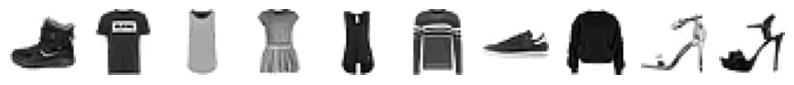

In [4]:
# input 데이터 확인.
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')
plt.show()

In [5]:
# target 데이터 확인.
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
# target당 몇 개의 데이터가 있는지 확인
import numpy as np
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [7]:
# 데이터의 크기가 크기 때문에, 전체 데이터를 한꺼번에 사용하여 모델을 훈련하는 것보다 하나씩 꺼내서 모델을 훈련하는 방법이 더 효율적임
# stochastic gradient descent(데이터를 한 개씩 꺼내서 경사를 내려가는 방법) 이용

# SGDClassifier은 2차원 입력을 다루지 못하므로 reshape
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [8]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs= -1)
print(np.mean(scores['test_score']))

# 점수가 그렇게 높지 않음, epoch를 늘려도 비슷한 결과를 출력.

0.8196000000000001


In [9]:
# 인공 신경망 이용
import tensorflow as tf
from tensorflow import keras

In [10]:
# 딥러닝에선 교차 검증을 잘 사용하지 않음
  # 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적임
  # 교차 검증을 수행하기에는 시간이 너무 오래 걸림
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [11]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [12]:
# 밀집층 생성
dense = keras.layers.Dense(10, activation= 'softmax', input_shape=(784,))
# (뉴런 개수, 뉴련의 출력에 적용할 함수, 입력의 크기)
# 10개의 패션 아이템을 분류하기 때문에 10개로 지정
# 다중 분류이기 때문에 softmax 함수 지정

In [13]:
model = keras.Sequential(dense)

In [14]:
# keras 모델은 훈련 전에 설정 단계가 존재
# target을 one-hot-encoding으로 변경하지 않고 사용
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [15]:
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 8s 2ms/step - loss: 0.6082 - accuracy: 0.7918
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4745 - accuracy: 0.8379
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4521 - accuracy: 0.8472
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4392 - accuracy: 0.8507
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4294 - accuracy: 0.8547


In [16]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4523 - accuracy: 0.8491


[0.45234066247940063, 0.8490833044052124]

In [17]:
# 4-2 심층 신경망
# 인공 신경망에 층을 여러 개 추가하기

In [18]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [19]:
from sklearn.model_selection import train_test_split
# 이미지의 픽셀값을 0~255 범위에서 0~1로 변환하는 과정
train_scaled = train_input / 255.0

# 2차원배열을 1차원배열로 만드는 과정
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [20]:
# 입력층과 출력층 사이에 층을 추가해줌, 그 사이에 있는 층들을 은닉층이라고 함.
# 은닉층에는 활성화 함수가 표시되어 있는데, 이전 출력층에 적용했던 softmax 함수도 활성화함수.
# 출력층에 적용하는 활성화함수는 sigmoid, softmax로 제한되어 있지만, 은닉층의 활성화함수는 비교적 자유로움.

# 은닉층의 활성화함수엔 sigmoid, 출력층의 활성화함수엔 softmax를 적용해봄.

# 은닉층의 뉴런을 100개로 설정함. 뉴런 개수를 정하는 데에는 특별한 기준은 없으나, 몇 개의 뉴런을 둘 지 판단하기 위해선 많은 경험이 필요.
# 단, 출력층의 뉴런보다는 많게 만들어야 함.
dense1 = keras.layers.Dense(100, activation ='sigmoid', input_shape = (784,))

# 출력층의 뉴런은 최종적으로 분류될 item의 개수
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [21]:
# 생성된 두 개의 층으로 심층 신경망 생성
model = keras.Sequential([dense1, dense2])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# dense 객체를 만들지 않고 바로 추가하는 방법
model = keras.Sequential([keras.layers.Dense(100, activation ='sigmoid', input_shape = (784,), name = 'hidden'), keras.layers.Dense(10, activation = 'softmax', name = 'output')], name = 'fashion MNIST Model')

In [24]:
model.summary()

Model: "fashion MNIST Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# 또 다른 방법으로 객체 생성 후 add이용
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation ='sigmoid', input_shape = (784,), name = 'hidden'))
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5662 - accuracy: 0.8070
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4108 - accuracy: 0.8529
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3760 - accuracy: 0.8650
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3536 - accuracy: 0.8722
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3371 - accuracy: 0.8776


In [55]:
# ReLU 함수, max(0, z)
model = keras.Sequential()

# 입력층 뒤에 Flatten 추가함, 나머지 입력 차원을 모두 일렬로 펼치는 역할(= reshape)
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu', name = 'hidden'))
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))

In [56]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [58]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

# sigmoid 함수를 사용했을 때보다 성능이 조금 향상됨

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5269 - accuracy: 0.8147
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3902 - accuracy: 0.8592
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3527 - accuracy: 0.8726
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3286 - accuracy: 0.8830
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.8887


In [59]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3504 - accuracy: 0.8800


[0.350428968667984, 0.8799999952316284]

In [32]:
# keras는 다양한 종류의 gradient descent 알고리즘을 제공함. 이를 optimizer라고 함

In [60]:
# 다른 optimizer 테스트
# 확률적 경사 하강법 (SDG) 가장 기본적
# 이름은 sdg 지만, 기본적으로 케라스는 미니배치를 사용함(default : 32)
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [61]:
# 또는 이렇게
sgd = keras.optimizers.SGD()
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [35]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [36]:
# momentum optimization : 현재의 기울기뿐 아니라 더 과거의 업데이트 방향도 고려함.
# 이전 방식보다 더 빠르게 수렴할 수 있음
# local minimum에서 벗어나는 데 도움이 됨.
# 너무 클 경우 overshooting 문제가 발생할 수 있음.
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)

In [37]:
# 적응형 학습률 : 모델이 최적점에 가까이 할수록 학습률을 낮춤
# 적응형 학습률을 사용하는 대표적인 optimizer
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics= 'accuracy')

rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy', metrics= 'accuracy')

In [62]:
# momentum optimization과 rmsprop의 장점을 접목한 adam
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape= (28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [63]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5231 - accuracy: 0.8166
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3919 - accuracy: 0.8601
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3520 - accuracy: 0.8730
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3265 - accuracy: 0.8812
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3074 - accuracy: 0.8868


In [40]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8794


[0.3438423275947571, 0.8794166445732117]

In [41]:
# 7-3 신경망 모델 훈련
# 모델을 훈련하는데 필요한 다양한 도구들을 알아보자

In [42]:
# 손실함수
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [64]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [65]:
model = model_fn()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               78500     
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# verbose = 0 : 훈련과정을 출력하지 않음.
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [46]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


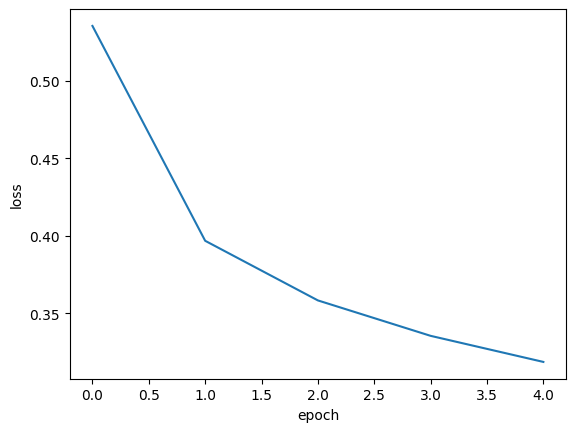

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

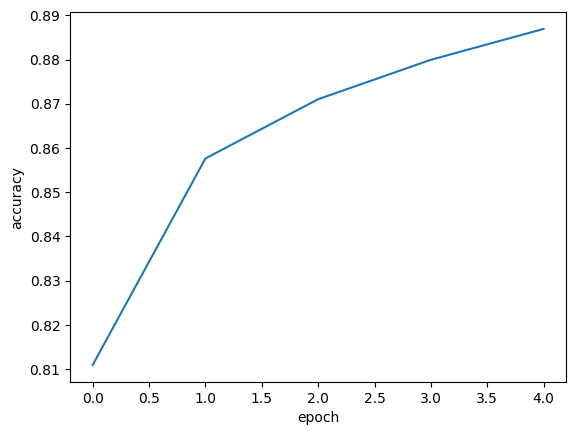

In [48]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5320 - accuracy: 0.8109
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3903 - accuracy: 0.8599
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3525 - accuracy: 0.8736
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3296 - accuracy: 0.8804
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3163 - accuracy: 0.8870
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3044 - accuracy: 0.8896
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2980 - accuracy: 0.8946
Epoch 8/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2881 - accuracy: 0.8986
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2783 - accuracy: 0.9014
Epoch 10/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.270

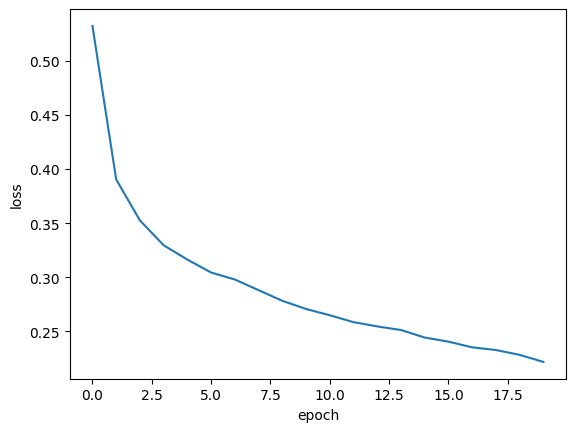

In [66]:
# epoch를 늘려서 손실도와 정확도를 재측정
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [67]:
# overfitting이 되진 않았는지 확인.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# 검증데이터 전달 가능 validation_data
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [51]:
# history에 검증 데이터에 대한 key 추가됨
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


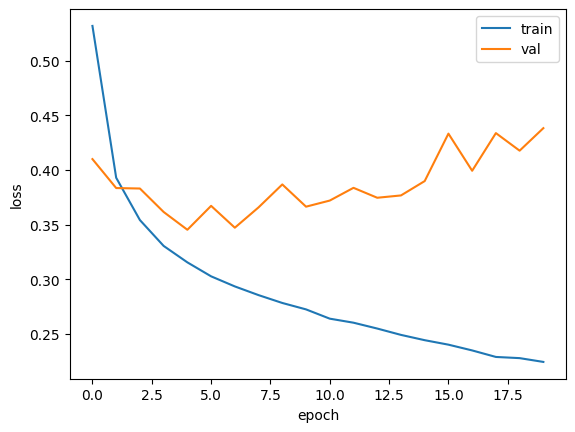

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 5번째 epoch까지는 감소하다가 6번째부터 손실이 증가하고 있음
# 6번째부터 overfitting

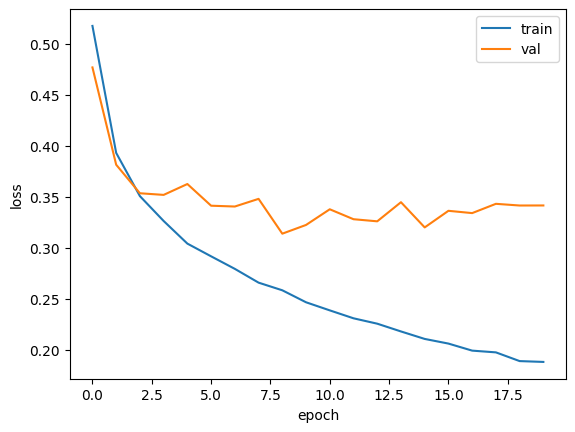

In [53]:
# 하이퍼파라미터를 조정하여 overfitting을 완화하는 방법을 알아보자

# adam optimazer를 이용
# adam은 적응적 학습률을 사용하기 때문에 epoch가 증가하면서 학습률의 크기를 조정할 수 있음.
model = model_fn()
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 손실이 이전보다 줄어듦을 확인. 이 데이터셋에는 adam optimazer가 잘 맞는다는 것을 확인.

In [54]:
# overfitting을 막는 다른 방법
# dropout : 층에 있는 일부 뉴런을 랜덤하게 꺼서 overfitting을 막음
# 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 막을 수 있고, 모든 입력에 주의를 기울여야 함. 따라서 overfitting을 막을 수 있는 것.

In [69]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

# 30% 정도를 drop하겠다는 것
# drop out 층이 생성된 것을 확인.

# 훈련이 끝나고 평가를 할 때는 모든 뉴런을 사용해야 함.
# 케라스는 평가데이터에 대해서는 알아서 drop out을 적용하지 않음

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_24 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5993 - accuracy: 0.7905 - val_loss: 0.4372 - val_accuracy: 0.8442
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4429 - accuracy: 0.8401 - val_loss: 0.3801 - val_accuracy: 0.8639
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4041 - accuracy: 0.8548 - val_loss: 0.3860 - val_accuracy: 0.8582
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3838 - accuracy: 0.8596 - val_loss: 0.3626 - val_accuracy: 0.8668
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3680 - accuracy: 0.8662 - val_loss: 0.3537 - val_accuracy: 0.8720
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3562 - accuracy: 0.8693 - val_loss: 0.3318 - val_accuracy: 0.8772
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3451 - accuracy: 0.8740 - val_loss: 0.3467 - val_accuracy:

In [72]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

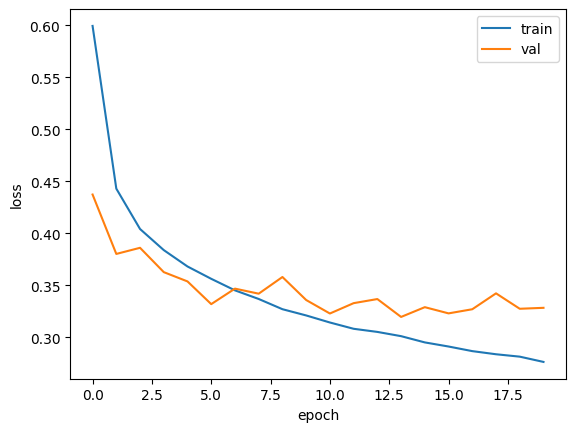

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 과대적합이 확실히 줄어듦을 확인. epoch를 대략 10정도로 수정하면 더 완벽한 모델이 될 것 같음.

In [75]:
# 케라스 모델은 훈련된 모델의 파라미터, 모델 구조와 파라미터를 저장하는 메서드를 제공함.

model.save_weights('model_weights.h5')

model.save('model_whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
# ! << 셀 명령을 실행할 때 사용
!ls -al *.h5

-rw-r--r-- 1 root root 333144 Oct  8 06:21 model_weights.h5
-rw-r--r-- 1 root root 981080 Oct  8 06:21 model_whole.h5


In [77]:
# 저장한 모델 또는 모델 파라미터를 사용해보자

# 모델을 새로 만들고 저장한 모델 파라미터를 적재함
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model_weights.h5')

In [80]:
# 검증해보자
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 2s 4ms/step
0.885


In [83]:
model = keras.models.load_model('model_whole.h5')
model.evaluate(val_scaled, val_target)
# 같은 모델을 불러온 것이기 때문에 위와 동일한 결과를 얻었음

375/375 [==============================] - 1s 2ms/step - loss: 0.3283 - accuracy: 0.8850


[0.32826927304267883, 0.8849999904632568]

In [86]:
# 콜백
# 훈련 과정 중간에 어떤 작업을 수행할 수 있게 해줌.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only = True)

model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks= [checkpoint_cb])
# 최상의 검증 점수를 낸 모델을 저장함.
# 최적의 epoch를 찾고 또 훈련을 할 필요가 없이 처음 훈련에서 바로 저장할 수 있음.

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5896 - accuracy: 0.7927 - val_loss: 0.4187 - val_accuracy: 0.8468
Epoch 2/20
  65/1500 [>.............................] - ETA: 3s - loss: 0.4378 - accuracy: 0.8356

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 4s 3ms/step - loss: 0.4374 - accuracy: 0.8404 - val_loss: 0.3711 - val_accuracy: 0.8622
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4000 - accuracy: 0.8552 - val_loss: 0.3645 - val_accuracy: 0.8681
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3814 - accuracy: 0.8589 - val_loss: 0.3590 - val_accuracy: 0.8680
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3650 - accuracy: 0.8658 - val_loss: 0.3730 - val_accuracy: 0.8597
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3484 - accuracy: 0.8714 - val_loss: 0.3475 - val_accuracy: 0.8712
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3425 - accuracy: 0.8716 - val_loss: 0.3392 - val_accuracy: 0.8754
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3326 - accuracy: 0.8770 - val_loss: 0.3384 - val_accuracy: 0.8719
Epo

In [87]:
# 최적의 모델 평가
model = keras.models.load_model('best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3133 - accuracy: 0.8840


[0.3132631778717041, 0.8840000033378601]

In [88]:
# 이제 한 번에 최적의 모델까지 저장할 수 있지만, 찾은 후에도 여전히 20번의 epoch를 모두 수행하고 있음
# 최적의 모델을 찾으면 조기종료할 수 있게 해줌

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only = True)
# ptience : 향상되지 않더라도 참고 진행할 횟수
# 2로 두면 2번 연속 검증 점수가 향상되지 않으면 중지
# restore_best_weights : 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks= [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 10s 5ms/step - loss: 0.5901 - accuracy: 0.7942 - val_loss: 0.4463 - val_accuracy: 0.8422
Epoch 2/20
  43/1500 [..............................] - ETA: 5s - loss: 0.4539 - accuracy: 0.8379

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 8s 5ms/step - loss: 0.4401 - accuracy: 0.8418 - val_loss: 0.3832 - val_accuracy: 0.8595
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4029 - accuracy: 0.8549 - val_loss: 0.3702 - val_accuracy: 0.8627
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3829 - accuracy: 0.8608 - val_loss: 0.3880 - val_accuracy: 0.8579
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3678 - accuracy: 0.8668 - val_loss: 0.3425 - val_accuracy: 0.8752
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3549 - accuracy: 0.8697 - val_loss: 0.3488 - val_accuracy: 0.8707
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3463 - accuracy: 0.8728 - val_loss: 0.3375 - val_accuracy: 0.8751
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3338 - accuracy: 0.8765 - val_loss: 0.3382 - val_accuracy: 0.8732
Epo

In [89]:
print(early_stopping_cb.stopped_epoch)
# 0~8 , 9번째까지 진행 후 훈련이 중지됨

8


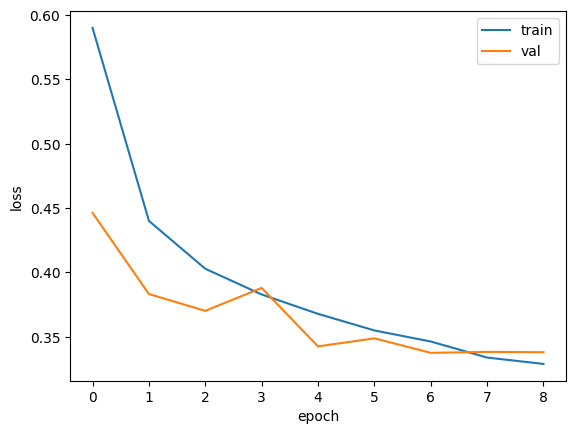

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [91]:
model.evaluate(val_scaled, val_target)
# 2 번 참았으므로 9-2 / 7번째 epoch가 최상의 모델로 저장된 모습

375/375 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8751


[0.3375006914138794, 0.875083327293396]